https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim

In [1]:
import gensim 

In [2]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

In [12]:
#with open('/80K-ready.txt', 'r') as myfile:
#    train = myfile.read()

In [13]:
train = fetch_20newsgroups()

In [14]:
def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

In [15]:
sentences = [line for text in train.data for line in clean(text)]

In [17]:
#print sentences

In [18]:
model = Word2Vec(sentences, workers=4, size=100, min_count=50, window=10, sample=1e-3)

In [20]:
#print (model.most_similar('memory'))

In [25]:
#X = model[model.wv.vocab]

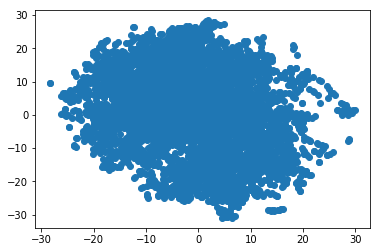

In [24]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()